In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
path='../JSON Files'

In [2]:
from os import listdir
from os.path import isfile,join
# putting all file paths in jsonfiles
jsonfiles = [f for f in listdir(path) if isfile(join(path,f))]

In [3]:
csk="Chennai Super Kings"
rcb="Royal Challengers Bangalore"

### Separate RCB matches for 2018-2020 and CSK for 2021

In [4]:
def getMatches(year,team):
    matches=[]
    for file in jsonfiles:
        f=open(path+'/'+file,)
        data=json.load(f)
        info=data.get('info')
        date=info.get('dates')
        split=date[0].split('-')
        year_str=split[0]
        year_int=int(year_str)
        if year_int==year:
            innings=data.get('innings')
            for inning in innings:
                if inning.get('team')==team:
                    matches.append(file)
    matches=list(set(matches))
    return matches

In [5]:
matches_2018=getMatches(2018,rcb) #contains all rcb matches 
matches_2019=getMatches(2019,rcb) #contains all rcb matches
matches_2020=getMatches(2020,rcb) #contains all rcb matches
matches_2021=getMatches(2021,csk) #contains all csk matches

print(len(matches_2018))
print(len(matches_2019))
print(len(matches_2020))
print(len(matches_2021))

14
14
15
16


# Batting Stats

In [6]:
batsman='MM Ali'
player='MM Ali'

In [7]:
def get_details(files,team):
    score_arr=[]
    balls_arr=[]
    pos_arr=[]
    out_arr=[]
    for file in files:
        f=open(path+'/'+file,)
        data=json.load(f)
        info=data.get('info')
        players=info.get('players')
        team_players=players.get(team)
        index=-1
        if batsman in team_players:
            index=team_players.index(batsman)
            innings=data.get('innings')
            for i in range(0,2):
                inning=innings[i]
                score=0
                balls=0
                out=0
                batted=False
                if inning.get('team')==team:
                    overs=inning.get('overs')
                    for over in overs:
                        for delivery in over.get('deliveries'):
                            if delivery.get('batter')==batsman or delivery.get('non_striker')==batsman:
                                batted=True
                                runs=delivery.get('runs')
                                if delivery.get('batter')==batsman:
                                    if delivery.get('extras') and delivery.get('extras').get('wides'):
                                        continue
                                    score=score+runs.get('batter')
                                    balls=balls+1
                                    if 'wickets' in delivery:
                                        wickets=delivery.get('wickets')
                                        for wicket in wickets:
                                            if wicket.get('player_out')==batsman:
                                                out=1
                    if batted:
                        score_arr.append(score)
                        balls_arr.append(balls)
                        pos_arr.append(index+1)
                    else:
                        score_arr.append(0)
                        balls_arr.append(0)
                        pos_arr.append(-1)
                        out=0
                    out_arr.append(out)
    return score_arr,balls_arr,pos_arr,out_arr

In [8]:
score,balls,position,out=get_details(matches_2018,rcb) #details of 2018
col={'score':score,'balls':balls,'position':position,'out':out}
df_2018=pd.DataFrame(data=col)
df_2018['year']=2018
df_2018

,score,balls,position,out,year
0,1,3,2,1,2018
1,1,2,4,1,2018
2,0,0,-1,0,2018
3,10,7,5,1,2018
4,65,34,4,1,2018


In [9]:
score,balls,position,out=get_details(matches_2019,rcb) #details of 2019
col={'score':score,'balls':balls,'position':position,'out':out}
df_2019=pd.DataFrame(data=col)
df_2019['year']=2019
df_2019

,score,balls,position,out,year
0,0,0,-1,0,2019
1,18,9,6,0,2019
2,32,18,5,1,2019
3,0,2,5,0,2019
4,66,28,4,1,2019
5,4,5,4,1,2019
6,2,8,5,0,2019
7,9,8,3,1,2019
8,26,16,6,1,2019
9,50,32,4,1,2019


In [10]:
score,balls,position,out=get_details(matches_2020,rcb) #details of 2020
col={'score':score,'balls':balls,'position':position,'out':out}
df_2020=pd.DataFrame(data=col)
df_2020['year']=2020
df_2020

,score,balls,position,out,year
0,1,2,5,1,2020
1,0,1,5,1,2020
2,11,13,5,1,2020


In [11]:
score,balls,position,out=get_details(matches_2021,csk) #details of 2021
col={'score':score,'balls':balls,'position':position,'out':out}
df_2021=pd.DataFrame(data=col)
df_2021['year']=2021
df_2021

,score,balls,position,out,year
0,46,31,3,1,2021
1,25,12,3,1,2021
2,58,36,3,1,2021
3,0,6,3,1,2021
4,32,28,3,1,2021
5,37,20,4,0,2021
6,26,20,3,1,2021
7,15,8,3,1,2021
8,17,17,3,1,2021
9,16,12,6,1,2021


In [12]:
df_rcb=pd.concat([df_2018,df_2019,df_2020])
df_csk=df_2021.copy()

In [13]:
df_rcb.head()

,score,balls,position,out,year
0,1,3,2,1,2018
1,1,2,4,1,2018
2,0,0,-1,0,2018
3,10,7,5,1,2018
4,65,34,4,1,2018


In [14]:
df_csk.head()

,score,balls,position,out,year
0,46,31,3,1,2021
1,25,12,3,1,2021
2,58,36,3,1,2021
3,0,6,3,1,2021
4,32,28,3,1,2021


In [15]:
df=pd.concat([df_rcb,df_csk])
df.shape

(34, 5)

In [16]:
df.to_csv('moeen.csv',index=False)

In [17]:
runs=[]
sr=[] #strike rate
years=[y for y in range(2018,2022)]
years.sort()
for year in years:
    df_new=df[df['year']==year]
    run=df_new['score'].sum()
    ball=df_new['balls'].sum()
    sr.append((run*100)/ball)
    runs.append(run)
avg=[19.25,27.50,4,25.50]
print(avg)
print(runs)
print(sr)

[19.25, 27.5, 4, 25.5]
[77, 220, 12, 357]
[167.3913043478261, 165.41353383458647, 75.0, 137.30769230769232]


In [18]:
df_stats=pd.DataFrame({'Years':years,'Runs':runs,'Average':avg,'Strike Rate':sr})
df_stats.to_csv('moeen_stats.csv',index=False)
df_stats

,Years,Runs,Average,Strike Rate
0,2018,77,19.25,167.391304
1,2019,220,27.50,165.413534
2,2020,12,4.00,75.000000
3,2021,357,25.50,137.307692


In [19]:
played=[]
missed=[]
for y in range(2018,2020):
    df_y=df[df['year']==y]
    play=df_y.shape[0]
    total=len(getMatches(y,rcb))
    played.append(play)
    missed.append(total-play)

for y in range(2020,2022):
    df_y=df[df['year']==y]
    play=df_y.shape[0]
    total=len(getMatches(y,csk))
    played.append(play)
    missed.append(total-play)

In [20]:
print(played,missed)
years=[y for y in range(2018,2022)]

[5, 11, 3, 15] [9, 3, 11, 1]


<ipython-input-21-0ef27f6705c1>:21: MatplotlibDeprecationWarning: 
The inverse_transformed function was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use transformed(transform.inverted()) instead.
  bb=leg.get_bbox_to_anchor().inverse_transformed(ax.transAxes)


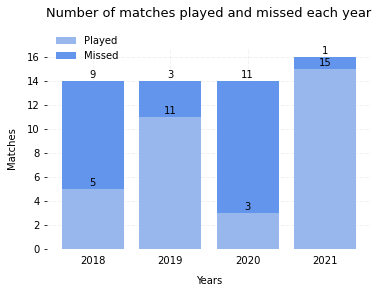

In [21]:
fig=plt.figure()
ax=fig.add_axes([0.15,0.13,0.75,0.70])
rects1 = ax.bar(years,played,color='#98b8ed',zorder=3)
rects2 = ax.bar(years,missed,color='#6495ed',bottom=played,zorder=3)

ax.grid(b=True, color='grey',linestyle='-.',linewidth=0.5,alpha=0.2,zorder=0)
for s in ['top','bottom','left','right']:
    ax.spines[s].set_visible(False)
    
ax.xaxis.set_ticks_position('none')

ax.set_xlabel('Years',labelpad=10)
ax.set_ylabel('Matches',labelpad=10)

ax.set_xticks(years)
ax.set_xticklabels(years)

leg=ax.legend((rects1[0],rects2[0]),('Played', 'Missed'),frameon=False)

# Get the bounding box of the original legend
bb=leg.get_bbox_to_anchor().inverse_transformed(ax.transAxes)

# Change to location of the legend. 
xOffset = 0
yOffset = 0.1
bb.x0 += xOffset
bb.x1 += xOffset
bb.y0 += yOffset
bb.y1 += yOffset
leg.set_bbox_to_anchor(bb,transform=ax.transAxes)

def autolabel(rects):
    for rect in rects:
        height=rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., height+0.05,'%d' % int(height),ha='center', va='bottom')

autolabel(rects1)
for (rect1,rect2) in zip(rects1,rects2):
    height=rect1.get_height()+rect2.get_height()
    if rect2.get_height()==0:
            continue
    ax.text(rect2.get_x()+rect2.get_width()/2.,height+0.05,'%d' % int(rect2.get_height()),ha='center', va='bottom')

fig_title='Number of matches played and missed each year'
ax.text(0.5, 1.15, fig_title,horizontalalignment='center',fontsize=13,transform = ax.transAxes)
plt.savefig('graphs/Matches played and missed in each year.png',dpi=300)

plt.show()

In [22]:
files_2019=[]
for file in jsonfiles:
    f=open(path+'/'+file,)
    data=json.load(f)
    info=data.get('info')
    players=info.get('players')
    date=info.get('dates')
    split=date[0].split('-')
    year_str=split[0]
    year_int=int(year_str)
    if year_int==2019:
        for key in players:
            if key==rcb:
                files_2019.append(file)

In [23]:
matches=[]
for file in files_2019:
    f=open(path+'/'+file,)
    data=json.load(f)
    info=data.get('info')
    players=info.get('players')
    for key in players:
        if key==rcb:
            if player in players[key]:
                matches.append(1)
            else:
                matches.append(0)

matches

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0]

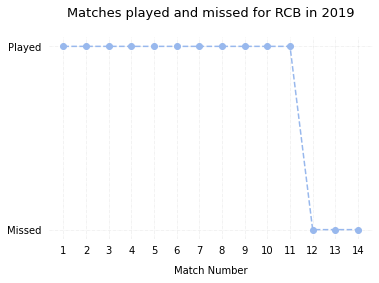

In [24]:
match_no=[x for x in range(1,15)]
fig=plt.figure()
ax=fig.add_axes([0.15,0.13,0.75,0.70])
ax.plot(match_no,matches,marker='o',linestyle='--',color='#98b8ed')

ax.grid(b=True, color='grey',linestyle='-.',linewidth=0.5,alpha=0.2,zorder=0)
for s in ['top','bottom','left','right']:
    ax.spines[s].set_visible(False)

ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
    
ax.set_xlabel('Match Number',labelpad=10)
ax.set_xticks(match_no)
ax.set_yticks([1,0])
ax.set_yticklabels(['Played','Missed'])

fig_title='Matches played and missed for RCB in 2019'
ax.text(0.5, 1.1, fig_title,horizontalalignment='center',fontsize=13,transform = ax.transAxes)
plt.savefig('graphs/Matches played and missed for RCB.png',dpi=300)

### Listing all the RCB players who played in 2019

In [25]:
players_lst=[]
runs_lst=[]
balls_lst=[]
def get_runs_balls():
    for file in files_2019:
        f=open(path+'/'+file,)
        data=json.load(f)
        info=data.get('info')
        date=info.get('dates')
        teams=info.get('players')
        team_names=info.get('teams')
        if rcb not in team_names:
            continue
        for team in teams:
            if team!=rcb:
                continue
            for i in range(0,11):
                bat=teams[team][i]
                if bat not in players_lst:
                    players_lst.append(bat)
                    runs_lst.append(0)
                    balls_lst.append(0)
        innings=data.get('innings')
        for i in range(0,2):
            inning=innings[i]
            overs=inning.get('overs')
            for over in overs:
                for delivery in over.get('deliveries'):
                    batter=delivery.get('batter')
                    if batter not in players_lst:
                        continue
                    idx=players_lst.index(batter)
                    runs=delivery.get('runs')
                    if delivery.get('extras') and delivery.get('extras').get('wides'):
                            continue
                    
                    index=players_lst.index(batter)
                    runs_lst[idx]=runs_lst[idx]+runs.get('batter')
                    balls_lst[idx]=balls_lst[idx]+1

In [26]:
get_runs_balls()

In [27]:
print(players_lst)

['V Kohli', 'PA Patel', 'MM Ali', 'AB de Villiers', 'SO Hetmyer', 'S Dube', 'C de Grandhomme', 'Navdeep Saini', 'YS Chahal', 'UT Yadav', 'Mohammed Siraj', 'P Ray Barman', 'MP Stoinis', 'AD Nath', 'P Negi', 'TG Southee', 'H Klaasen', 'DW Steyn', 'Washington Sundar', 'Gurkeerat Singh', 'K Khejroliya']


In [28]:
df_final=pd.DataFrame({'Players':players_lst,'Runs':runs_lst,'Balls':balls_lst})
df_final.head()

,Players,Runs,Balls
0,V Kohli,464,328
1,PA Patel,373,268
2,MM Ali,220,133
3,AB de Villiers,442,287
4,SO Hetmyer,90,73


In [29]:
df_final['Strike Rate']=(df_final['Runs']*100)/df_final['Balls']

In [30]:
df_200=df_final[df_final['Runs']>=200]

In [31]:
df_200=df_200.sort_values(by=['Runs'],ascending=False)

In [32]:
players=list(df_200['Players'])
sr=list(df_200['Strike Rate'])
runs=list(df_200['Runs'])

<ipython-input-33-3c3e51b66550>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(players,fontsize=8,rotation=45)


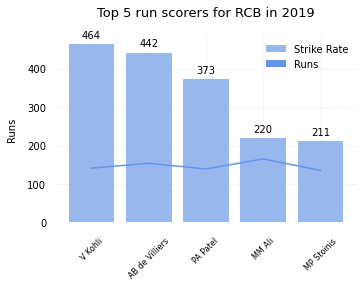

In [33]:
fig=plt.figure()
ax=fig.add_axes([0.20,0.20,0.70,0.65])

ax.grid(b=True, color='grey', linestyle='-.', linewidth=0.5, alpha=0.2,zorder=0)

for s in ['top','bottom','left','right']:
    ax.spines[s].set_visible(False)

ax.set_ylabel('Runs',labelpad=10)
# Remove x,y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad=10)
ax.yaxis.set_tick_params(pad=5)

fig_title='Top 5 run scorers for RCB in 2019'
ax.text(0.5, 1.10,fig_title,horizontalalignment='center',fontsize=13,transform=ax.transAxes)

ax.set_xticklabels(players,fontsize=8,rotation=45)

ax.legend((rects1[0],rects2[0]),('Strike Rate','Runs'),frameon=False)

def autolabel(rects):
    for rect in rects:
        height=rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 10+height,
                '%d' % int(height),
                ha='center', va='bottom')

rects1=ax.plot(sr,linestyle='-',color='#6495ed',zorder=4)
rects2=ax.bar(players,runs,label='Runs',align='center',color='#98b8ed',zorder=3)
autolabel(rects2)

plt.savefig('graphs/Top 5 run scorers for RCB in 2019.png',dpi=300)
plt.show()

# Bowling Stats

In [34]:
extras_types=set()
out_types=set()

In [35]:
for file in jsonfiles:
    f=open(path+'/'+file,)
    data=json.load(f)
    info=data.get('info')
    innings=data.get('innings')
    for i in range(len(innings)):
        inning=innings[i]
        overs=inning.get('overs')
        for over in overs:
            for delivery in over.get('deliveries'):
                extras=delivery.get('extras')
                wickets=delivery.get('wickets')
                if extras:
                    for key in extras:
                        extras_types.add(key)
                if 'wickets' in delivery:
                    for w in wickets:
                        kind=w.get('kind')
                        out_types.add(kind)

In [36]:
print(extras_types)
print(out_types)

{'byes', 'wides', 'penalty', 'legbyes', 'noballs'}
{'run out', 'lbw', 'obstructing the field', 'bowled', 'retired hurt', 'caught and bowled', 'hit wicket', 'stumped', 'caught'}


In [37]:
player='MM Ali'

In [38]:
def bowl_details(files,team):
    runs_given=[]
    balls_bowled=[]
    wickets_taken=[]
    for file in files:
        f=open(path+'/'+file,)
        data=json.load(f)
        info=data.get('info')
        players=info.get('players')
        team_players=players.get(team)
        if player in team_players:
            innings=data.get('innings')
            runs=0
            balls=0
            wickets=0
            for i in range(len(innings)):
                inning=innings[i]
                overs=inning.get('overs')
                for over in overs:
                    for delivery in over.get('deliveries'):
                        if delivery.get('bowler')==player:
                            extras=delivery.get('extras')
                            wckts=delivery.get('wickets')
                            runs+=delivery.get('runs').get('batter')
                            if extras:
                                wides=extras.get('wides')
                                noballs=extras.get('noballs')
                                penalty=extras.get('penalty')
                                if wides:
                                    runs+=wides
                                    balls-=1
                                if noballs:
                                    runs+=noballs
                                    balls-=1
                                if penalty:
                                    runs+=penalty
                            balls+=1
                            if wckts:
                                for w in wckts:
                                    kind=w.get('kind')
                                    if kind!='run out' and kind!='obstructing the field' and kind!='retired hurt':
                                        wickets+=1
                                    
            runs_given.append(runs)
            balls_bowled.append(balls)
            wickets_taken.append(wickets)
    return runs_given,balls_bowled,wickets_taken

In [39]:
runs,balls,wickets=bowl_details(matches_2018,rcb)
df_2018_bowl=pd.DataFrame({'Runs':runs,'Balls':balls,'Wickets':wickets})
df_2018_bowl['year']=2018
df_2018_bowl

,Runs,Balls,Wickets,year
0,25,24,1,2018
1,19,12,0,2018
2,13,13,1,2018
3,19,18,0,2018
4,21,12,1,2018


In [40]:
runs,balls,wickets=bowl_details(matches_2019,rcb)
df_2019_bowl=pd.DataFrame({'Runs':runs,'Balls':balls,'Wickets':wickets})
df_2019_bowl['year']=2019
df_2019_bowl

,Runs,Balls,Wickets,year
0,19,24,1,2019
1,14,6,0,2019
2,22,24,1,2019
3,0,0,0,2019
4,13,6,0,2019
5,22,18,1,2019
6,29,18,0,2019
7,19,24,1,2019
8,0,0,0,2019
9,18,24,2,2019


In [41]:
runs,balls,wickets=bowl_details(matches_2020,rcb)
df_2020_bowl=pd.DataFrame({'Runs':runs,'Balls':balls,'Wickets':wickets})
df_2020_bowl['year']=2020
df_2020_bowl

,Runs,Balls,Wickets,year
0,17,12,0,2020
1,4,6,0,2020
2,21,12,1,2020


In [42]:
runs,balls,wickets=bowl_details(matches_2021,csk)
df_2021_bowl=pd.DataFrame({'Runs':runs,'Balls':balls,'Wickets':wickets})
df_2021_bowl['year']=2021
df_2021_bowl

,Runs,Balls,Wickets,year
0,17,18,1,2021
1,0,0,0,2021
2,1,6,1,2021
3,0,0,0,2021
4,0,0,0,2021
5,0,0,0,2021
6,7,18,3,2021
7,16,12,0,2021
8,5,6,0,2021
9,27,24,1,2021


In [43]:
df_rcb_bowl=pd.concat([df_2018_bowl,df_2019_bowl,df_2020_bowl])
df_csk_bowl=df_2021_bowl.copy()

In [44]:
print(df_rcb_bowl.shape)
print(df_csk_bowl.shape)

(19, 4)
(15, 4)


In [45]:
df_bowl=pd.concat([df_rcb_bowl,df_csk_bowl])
df_bowl.shape

(34, 4)

In [46]:
runs=[]
balls=[]
wickets=[]
years=[y for y in range(2018,2022)]
years.sort()
for year in years:
    df_new=df_bowl[df_bowl['year']==year]
    run=df_new['Runs'].sum()
    ball=df_new['Balls'].sum()
    wicket=df_new['Wickets'].sum()
    runs.append(run)
    balls.append(ball)
    wickets.append(wicket)
print(runs)
print(balls)
print(wickets)

[97, 169, 42, 161]
[79, 150, 30, 152]
[3, 6, 1, 6]


In [47]:
df_stats=pd.DataFrame({'Years':years,'Runs':runs,'Balls':balls,'Wickets':wickets})
df_stats['Economy']=df_stats['Runs']*6/df_stats['Balls']
df_stats['Strike Rate']=df_stats['Balls']/df_stats['Wickets']
df_stats['Average']=df_stats['Runs']/df_stats['Wickets']
df_stats.drop(['Runs','Balls','Wickets'],axis=1,inplace=True)
df_stats.to_csv('moeen_balls_stats.csv',index=False)
df_stats

,Years,Economy,Strike Rate,Average
0,2018,7.367089,26.333333,32.333333
1,2019,6.760000,25.000000,28.166667
2,2020,8.400000,30.000000,42.000000
3,2021,6.355263,25.333333,26.833333


In [48]:
less_than_2=df_2019_bowl[df_2019_bowl['Balls']<=12].shape[0]
more_than_2=df_2019_bowl[df_2019_bowl['Balls']>12].shape[0]
print(less_than_2)
print(more_than_2)

5
6


In [49]:
bowled=[5,6]

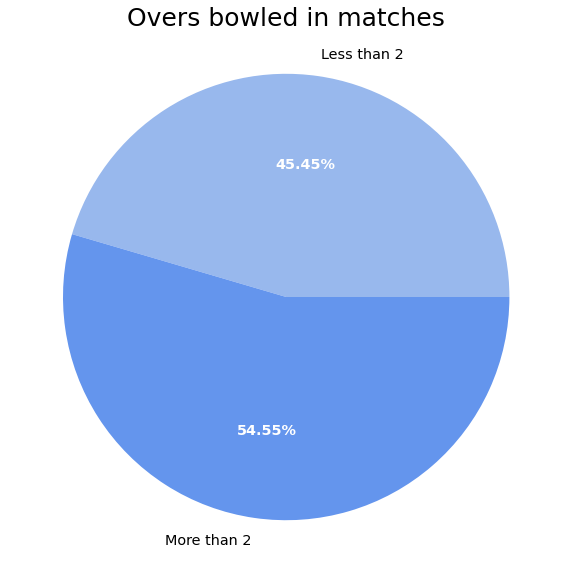

In [50]:
fig,ax=plt.subplots(figsize=(10,10))
ax.axis('equal')
colors=['#98b8ed','#6495ed']
patches,texts,pcts=ax.pie(bowled, labels=['Less than 2','More than 2'],colors=colors,autopct='%1.2f%%',
                          wedgeprops={'linewidth': 0, 'edgecolor': 'white'},
                         textprops={'size': 'x-large'})
plt.setp(pcts, color='white', fontweight='bold')
fig_title='Overs bowled in matches'
plt.text(0.5, 1,fig_title,horizontalalignment='center',fontsize=25,transform=ax.transAxes)
plt.savefig('graphs/Overs bowled in matches.png',dpi=300)
plt.show()